# Telecom Churn Case Study

## Problem statement

First metric is the average revenue per user, also known as ARPU. Average revenue per user tells the story of how much money a company is making for each person using its service. It is synonymous to customer lifetime value. Generally, telecommunications companies that offer bundling services enjoy a higher ARPU

Second metric is customer churn. Customer churn is defined in a similar fashion as you have studied throughout this program. This metric measures the number of subscribers who leave and obviously, a low churn rate is ideal. Companies that experience a high churn rate are under more pressure to generate revenue from other areas or gain new customers

Third metric is subscriber growth rate. A telecommunications company's future revenue growth has much to do with its ability to grow its customer base and add new subscribers. Subscriber growth is, therefore, an extremely important metric. A steady subscriber growth rate indicates a competitive telecommunications company that is keeping up with technology trends, thereby keeping customers happy and attracting new customers



Subscriber acquisition cost is very similar to customer acquisition cost. Although it seems straight-forward, subscriber acquisition cost has many layers. Of course, you’re going to need to factor in money spent on marketing and advertising. But those aren’t the only costs involved with gaining new subscribers. You also need to factor in commission costs to the people selling your product, as well as the costs involved with actually onboarding customers

Coming to TalkTel, although the firm has a stronghold in the sector, its customers are gradually migrating to competition. If this churn doesn’t stop, the firm will be in huge trouble. So due to intense competition and the threat of going bust, it decides to hire you as the data analyst and come up with a strategy to counter this

As a data scientist in the marketing department of company X, help them design a program to reach a given customer at the right time with relevant offers so as to enhance its customers retention and improve client loyalty. Do you have a quantitative approach in your mind that can predict which of their existing customers are likely to discontinue their service and should be the target audience for this campaign?

### importing required modules

In [33]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

#### Reading data set

In [2]:
# setting max no. of colums to dispaly in jupyter notebook
pd.set_option("display.max_columns",50)

In [3]:
#reading data set
df = pd.read_csv("dataset.csv")

#### Inspecting the Data frame

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   StreamingService  7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
#droping "customerID" from the data set it is a uniq id value
df.drop(['customerID'], axis=1, inplace=True)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preparation

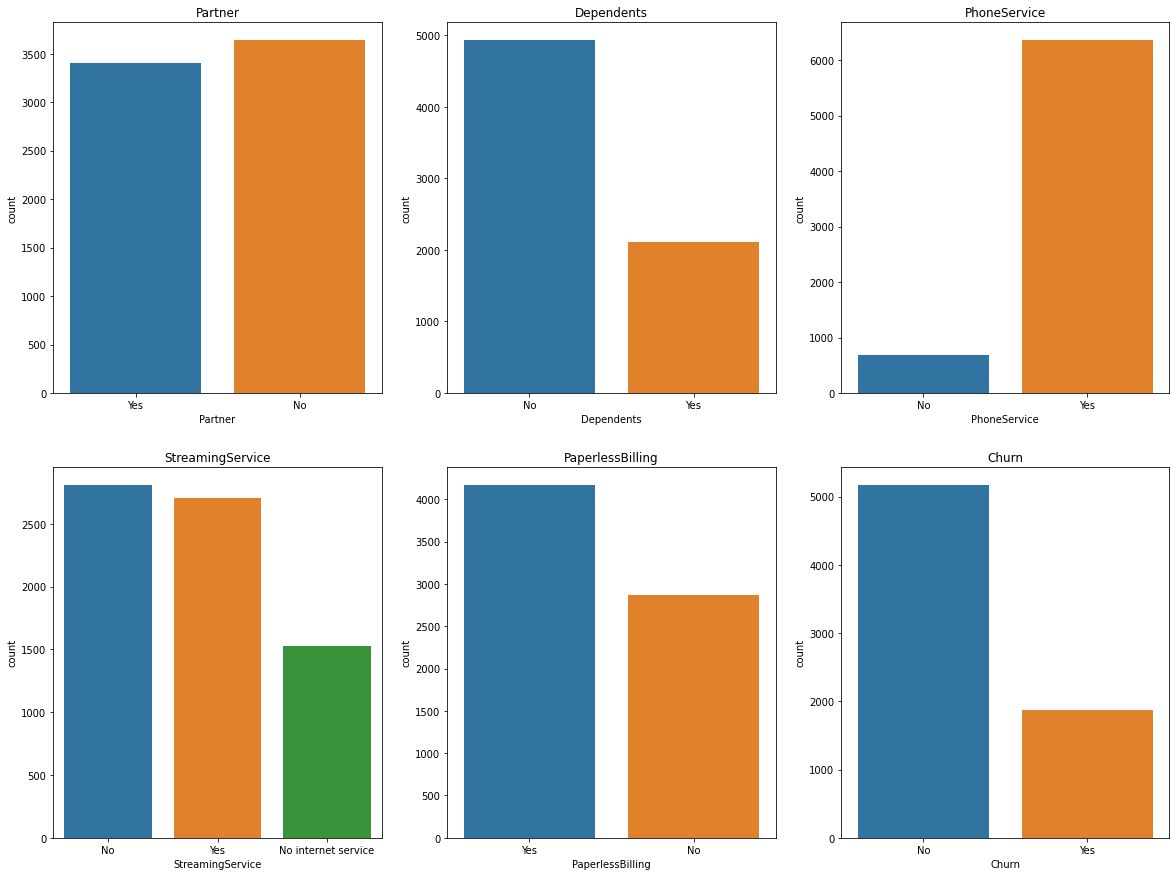

In [9]:
data_yes_no_columns = ['Partner','Dependents','PhoneService', 'StreamingService', 'PaperlessBilling','Churn']
#plotting count values for 'Partner','Dependents','PhoneService', 'StreamingService', 'PaperlessBilling','Churn' columns
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title("Partner")
sns.countplot(x='Partner', data=df)

plt.subplot(2,3,2)
plt.title("Dependents")
sns.countplot(x='Dependents', data=df)

plt.subplot(2,3,3)
plt.title("PhoneService")
sns.countplot(x='PhoneService', data=df)

plt.subplot(2,3,4)
plt.title("StreamingService")
sns.countplot(x='StreamingService', data=df)

plt.subplot(2,3,5)
plt.title("PaperlessBilling")
sns.countplot(x='PaperlessBilling', data=df)

plt.subplot(2,3,6)
plt.title("Churn")
sns.countplot(x='Churn', data=df)

plt.show()

Streaming service has 3 category, so removing streaming service from data_yes_no_columns list

#### Converting some binary variables (yes/no) to (1/0)

In [10]:
data_yes_no_columns = ['Partner','Dependents','PhoneService', 'PaperlessBilling','Churn']

#convering yes->1 no->0 for 'Partner','Dependents','PhoneService', 'PaperlessBilling','Churn' columns

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

df[data_yes_no_columns] =df[data_yes_no_columns].apply(binary_map)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,No,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,No,DSL,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### For categorical variables with multiple levels, create dummy features

In [12]:
#creating the dummy variables for some of the categorical variables and dropping the first
dummy1 = pd.get_dummies(df[['Contract','PaymentMethod','gender','InternetService']], drop_first=True)

# Adding the dymmy1 to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,Female,0,1,0,1,0,No phone service,DSL,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0
1,Male,0,0,0,34,1,No,DSL,No,One year,0,Mailed check,56.95,1889.5,0,1,0,0,0,1,1,0,0
2,Male,0,0,0,2,1,No,DSL,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0
3,Male,0,0,0,45,0,No phone service,DSL,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0
4,Female,0,0,0,2,1,No,Fiber optic,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0


In [14]:
#droping original columns 'Contract','PaymentMethod','gender','InternetService'
df.drop(['Contract','PaymentMethod','gender','InternetService'], axis=1, inplace= True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,No phone service,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0
1,0,0,0,34,1,No,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0
2,0,0,0,2,1,No,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0
3,0,0,0,45,0,No phone service,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0
4,0,0,0,2,1,No,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0


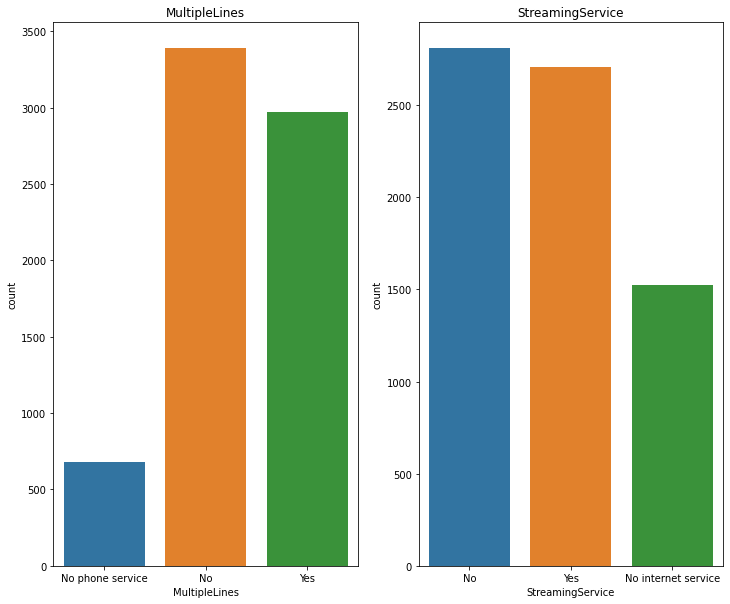

In [15]:
# lets visualize 'MultipleLines', 'StreamingService'
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("MultipleLines")
sns.countplot(x='MultipleLines', data=df)

plt.subplot(1,2,2)
plt.title("StreamingService")
sns.countplot(x='StreamingService', data=df)

plt.show()

In [16]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
ml.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [17]:
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,0,1,0,1,0,No phone service,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,No,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0
2,0,0,0,2,1,No,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0
3,0,0,0,45,0,No phone service,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,No,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0


In [18]:
# Dropping original 'MultipleLines' column
df.drop(['MultipleLines'], axis=1, inplace= True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,0,1,0,1,0,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,34,1,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0
2,0,0,0,2,1,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0
3,0,0,0,45,0,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0


In [19]:
# Creating dummy variables for the variable 'StreamingService'
ss = pd.get_dummies(df['StreamingService'], prefix='StreamingService')
ss.head()

,StreamingService_No,StreamingService_No internet service,StreamingService_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Dropping MultipleLines_No phone service column
ss1 = ss.drop(['StreamingService_No internet service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ss1], axis=1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
0,0,1,0,1,0,No,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,No,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,2,1,No,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,1,0
3,0,0,0,45,0,No,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,No,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0


In [21]:
# Dropping original 'StreamingService' column
df.drop(['StreamingService'], axis=1, inplace= True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,0,1,1,0,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [23]:
# The TotalCharges as numric data, imported as string
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

### checking for outliners

In [24]:
num_columns = df[['TotalCharges','MonthlyCharges','SeniorCitizen', 'tenure']]

#checking outliners at 25%, 50%, 75%, 90%, 95%, 99%
num_columns.describe(percentiles =[.25, .5,.75, .9,.95, .99])

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure
count,7032.000000,7043.000000,7043.000000,7043.000000
mean,2283.300441,64.761692,0.162147,32.371149
std,2266.771362,30.090047,0.368612,24.559481
min,18.800000,18.250000,0.000000,0.000000
25%,401.450000,35.500000,0.000000,9.000000
50%,1397.475000,70.350000,0.000000,29.000000
75%,3794.737500,89.850000,0.000000,55.000000
90%,5976.640000,102.600000,1.000000,69.000000
95%,6923.590000,107.400000,1.000000,72.000000
99%,8039.883000,114.729000,1.000000,72.000000


From the above distribution show, you can see that there no outliners in this data. The numbers are gradually increased.

### checking for null/missing values

In [25]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
StreamingService_No                       0
StreamingService_Yes                      0
dtype: int64

In [26]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)),2)

SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
StreamingService_No                      0.00
StreamingService_Yes                     0.00
dtype: float64

In [27]:
#removing null of TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

In [28]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/df.shape[1]),2)

SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
StreamingService_No                      0.0
StreamingService_Yes                     0.0
dtype: float64

### Split Test-Train data

In [29]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

x_train, x_test, y_train,y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
879,0,0,0,33,1,1,54.65,1665.20,0,0,0,0,0,1,0,0,0,1,1,0
5790,0,1,1,40,0,1,50.85,2036.55,0,0,0,1,0,0,0,0,0,0,0,1
6498,0,0,0,1,1,1,82.30,82.30,0,0,0,1,0,0,1,0,1,0,1,0
880,0,0,0,10,1,1,110.10,1043.30,0,0,0,1,0,1,1,0,1,0,0,1
2784,0,0,1,4,1,1,98.10,396.30,0,0,0,0,0,0,1,0,1,0,0,1


### Scaling numerical freatures

In [30]:
scaller = StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

<ipython-input-30-d6f1c8e9eddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['tenure','MonthlyCharges','TotalCharges']] = scaller.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,StreamingService_No,StreamingService_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,0,1,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,1,0,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,1,0,0,1


### looking for correlations

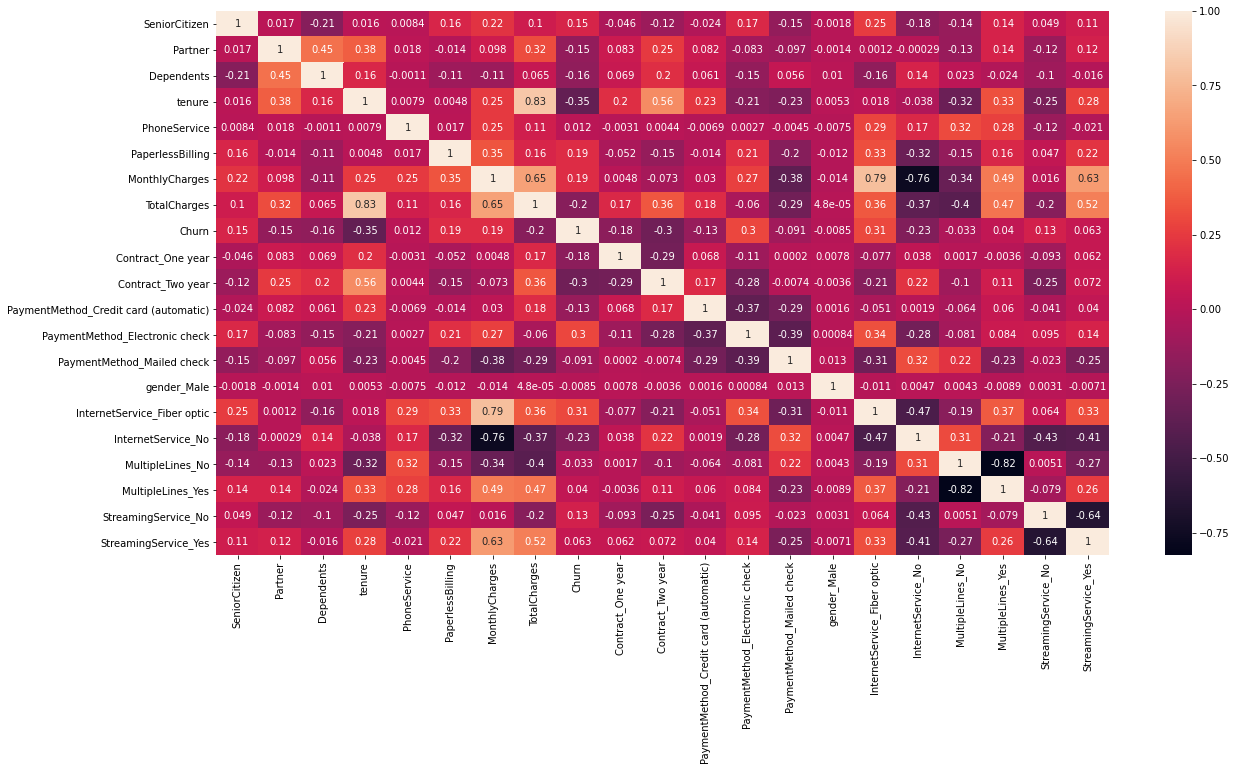

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Model Building

In [41]:
# Linear regression model
logm1 = sm.OLS(y_train,(sm.add_constant(x_train))).fit()
print(logm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:32:25   Log-Likelihood:                -2108.3
No. Observations:                4922   AIC:                             4255.
Df Residuals:                    4903   BIC:                             4378.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

P-value alway should be <=0.05

In [42]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,PhoneService,inf
17,MultipleLines_Yes,inf
16,MultipleLines_No,inf
15,InternetService_No,33.95
6,MonthlyCharges,31.26
18,StreamingService_No,18.51
19,StreamingService_Yes,11.54
7,TotalCharges,10.68
3,tenure,7.62
14,InternetService_Fiber optic,5.99


### Feature selection using RFE

In [47]:
logreg = LinearRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(x_train, y_train)

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [48]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 5),
 ('Dependents', False, 4),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 6),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('StreamingService_No', True, 1),
 ('StreamingService_Yes', True, 1)]

In [49]:
col = x_train.columns[rfe.support_]

### Accessing the model with statsmodels

In [50]:
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:33:45   Log-Likelihood:                -2111.7
No. Observations:                4922   AIC:                             4251.
Df Residuals:                    4908   BIC:                             4342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [51]:
col = col.drop('PhoneService',1)
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     150.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:35:11   Log-Likelihood:                -2111.7
No. Observations:                4922   AIC:                             4251.
Df Residuals:                    4908   BIC:                             4342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [52]:
col = col.drop('MultipleLines_No',1)
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     163.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:35:33   Log-Likelihood:                -2111.4
No. Observations:                4922   AIC:                             4249.
Df Residuals:                    4909   BIC:                             4333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [53]:
col = col.drop('MonthlyCharges',1)
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:36:00   Log-Likelihood:                -2111.9
No. Observations:                4922   AIC:                             4248.
Df Residuals:                    4910   BIC:                             4326.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### checking VIF

In [54]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalCharges,7.73
1,tenure,6.34
11,StreamingService_Yes,4.30
10,StreamingService_No,3.55
8,InternetService_No,3.08
5,Contract_Two year,2.51
7,InternetService_Fiber optic,1.97
4,Contract_One year,1.58
9,MultipleLines_Yes,1.40
6,PaymentMethod_Electronic check,1.28


All the VIF values and p-values seem to be in a good range. This model is explaining most of the variance without being too complex. So let's proceed with this model.

In [77]:
col = col.drop('TotalCharges',1)
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:51:29   Log-Likelihood:                -2153.9
No. Observations:                4922   AIC:                             4330.
Df Residuals:                    4911   BIC:                             4401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [78]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,StreamingService_Yes,4.29
9,StreamingService_No,3.35
4,Contract_Two year,2.51
1,tenure,2.35
7,InternetService_No,2.23
6,InternetService_Fiber optic,1.65
3,Contract_One year,1.57
8,MultipleLines_Yes,1.34
5,PaymentMethod_Electronic check,1.27
2,PaperlessBilling,1.20


In [79]:
col = col.drop('StreamingService_No',1)
x_train_sm = sm.add_constant(x_train[col])
logreg2 = sm.OLS(y_train, x_train_sm)
res =logreg2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:52:36   Log-Likelihood:                -2153.7
No. Observations:                4922   AIC:                             4329.
Df Residuals:                    4911   BIC:                             4401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [80]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,InternetService_Fiber optic,2.73
2,PaperlessBilling,2.42
4,Contract_Two year,2.38
8,MultipleLines_Yes,2.22
9,StreamingService_Yes,2.14
1,tenure,1.89
5,PaymentMethod_Electronic check,1.80
7,InternetService_No,1.64
3,Contract_One year,1.53
0,SeniorCitizen,1.31


### Residual Analysis

C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

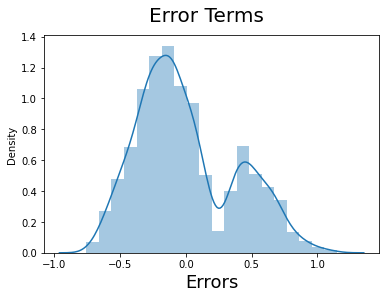

In [81]:
y_train_price = res.predict(x_train_sm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

#### Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [82]:
x_test[['tenure','MonthlyCharges','TotalCharges']] = scaller.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

<ipython-input-82-fed0a51196a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['tenure','MonthlyCharges','TotalCharges']] = scaller.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [83]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
x_test_rfe = x_test[col]

In [84]:
# Add a constant to the test set created
x_test_rfe = sm.add_constant(x_test_rfe)
x_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 942 to 4987
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           2110 non-null   float64
 1   SeniorCitizen                   2110 non-null   int64  
 2   tenure                          2110 non-null   float64
 3   PaperlessBilling                2110 non-null   int64  
 4   Contract_One year               2110 non-null   uint8  
 5   Contract_Two year               2110 non-null   uint8  
 6   PaymentMethod_Electronic check  2110 non-null   uint8  
 7   InternetService_Fiber optic     2110 non-null   uint8  
 8   InternetService_No              2110 non-null   uint8  
 9   MultipleLines_Yes               2110 non-null   uint8  
 10  StreamingService_Yes            2110 non-null   uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 96.8 KB


## Making predictions


In [85]:
y_pred = res.predict(x_test_rfe)

In [86]:
y_pred

942     0.531379
3730    0.587231
1761    0.249150
2283    0.536359
1872    0.179005
          ...   
1289    0.228714
3508    0.506593
6765    0.246768
3598    0.518343
4987    0.199128
Length: 2110, dtype: float64

Text(0, 0.5, 'y_pred')

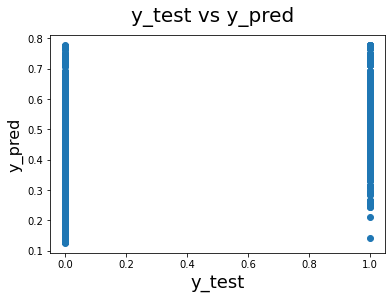

In [87]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

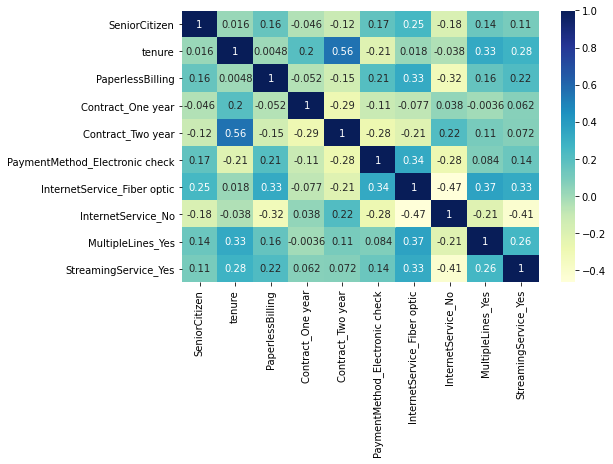

In [88]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(df[col].corr(), cmap="YlGnBu", annot=True)
plt.show()